# Importing libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import sqlite3
import tkinter as tk
from tkinter import ttk, END
import re

---

# Importing and inspecting sales_data-set.csv

In [2]:
# Read in the 'sales_data-set.csv' file as sales
sales = pd.read_csv('sales_data-set.csv')

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
sales.shape

(421570, 5)

In [5]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
sales_cols = sales.columns.tolist()
sales_cols

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

In [7]:
# Check for null values in the sales dataframe
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
# Check for duplicated data in sales dataframe
sales.duplicated().sum()

0

---

# Importing and inspecting Features_data_set.csv

In [9]:
# Read in the 'Features_data_set.csv' file as feat dataframe
feat = pd.read_csv('Features_data_set.csv')

In [10]:
feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
feat.shape

(8190, 12)

In [12]:
feat.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [13]:
feat_cols = feat.columns.tolist()
feat_cols

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday']

In [14]:
# Check for missing values in the feat dataframe
feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### ...there are missing values in this dataset which should be filled.

### Missing values in the markdown column are filled with zero (0) since it means there was no promotional markdown for the specific period

In [15]:
# Fill the missing values in markdown 1-5 with zero(0)
feat[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = (
    feat[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0))
feat

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [16]:
# Fill missing values in the Unemployment column with the mean
feat['Unemployment'] = feat['Unemployment'].fillna(feat['Unemployment'].mean())
feat

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,7.826821,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,7.826821,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,7.826821,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,7.826821,False


### A distribution plot of the CPI column is shown below

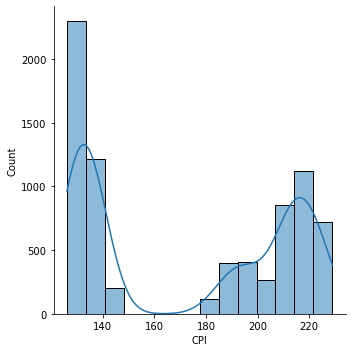

In [17]:
sns.displot(x='CPI', data=feat, kde=True)

### The data is not normally distributed and there are reapeting patterns relative to date in the CPI column. Thus, it might be appropriate to forward fill this column.

In [18]:
feat['CPI'] = feat['CPI'].fillna(method='ffill')

In [19]:
# Check for duplicate data
feat.duplicated().sum()

0

---

# Importing and inspecting store_info.csv

In [20]:
# Read in the 'store_info.csv' file as store_info dataframe
store_info = pd.read_csv('store_info.csv')

In [21]:
store_info.head()

,Store,Manager,Years_as_manager,Email,Address
0,1,Robert Alvey,1,Robert.Alvey@Walmart.org,4971 Janet Court;Livermore;CA;94550
1,2,Jerry Martinez,11,Jerry.Martinez@Walmart.org,4439 Gale Street;Livermore;CA;94550
2,3,Susanna Kellner,7,Susanna.Kellner@Walmart.org,856 Milton Street;Oakland;CA;94607
3,4,Marco Spivey,1,Marco.Spivey@Walmart.org,474 Merritt Avenue;Oakland;CA;94610
4,5,Timothy Narvaez,13,Timothy.Narvaez@Walmart.org,129 Grant Street;Redlands;CA;92373


In [22]:
store_info.shape

(48, 5)

In [23]:
store_info.describe()

,Store,Years_as_manager
count,48.00,48.000000
mean,24.50,10.020833
std,14.00,14.052318
min,1.00,0.000000
25%,12.75,3.750000
50%,24.50,9.000000
75%,36.25,12.250000
max,48.00,100.000000


### It is unrealistic to have 100 as the maximum number under the 'Years_as_manager' column
### It is advisable to filter out row(s) that contain 100 in the 'Years_as_manager' column for further inspection

In [24]:
store_info.loc[store_info['Years_as_manager'] == 100]

,Store,Manager,Years_as_manager,Email,Address
10,11,William Rodriguez,100,William.Rodriguez@Walmart.org,210 Beachcomber Drive;Pismo Beach;CA;93449


### Only one row is affected. This entry should be realistically replaced with 10

In [25]:

store_info.loc[store_info['Years_as_manager'] == 100, 'Years_as_manager'] = 10
store_info

,Store,Manager,Years_as_manager,Email,Address
0,1,Robert Alvey,1,Robert.Alvey@Walmart.org,4971 Janet Court;Livermore;CA;94550
1,2,Jerry Martinez,11,Jerry.Martinez@Walmart.org,4439 Gale Street;Livermore;CA;94550
2,3,Susanna Kellner,7,Susanna.Kellner@Walmart.org,856 Milton Street;Oakland;CA;94607
3,4,Marco Spivey,1,Marco.Spivey@Walmart.org,474 Merritt Avenue;Oakland;CA;94610
4,5,Timothy Narvaez,13,Timothy.Narvaez@Walmart.org,129 Grant Street;Redlands;CA;92373
5,6,NaN,3,George.Parker@Walmart.org,210 Beachcomber Drive;Pismo Beach;CA;93449
6,7,Amy Karasti,14,Amy.Karasti@Walmart.org,25538 Calaroga Avenue;Hayward;CA;94545
7,8,Shelia Arnold,2,Shelia.Arnold@Walmart.org,2807 Huxley Place;Fremont;CA;94555
8,9,Marguerite Peterson,10,Marguerite.Peterson@Walmart.org,12156 Oslo Drive;Truckee;CA;96161
9,10,John Chavez,14,John.Chavez@Walmart.org,4409 Star Jasmine Court;Bakersfield;CA;93304


### In database design, it is advisabe to have tables with atomic columns (in keeping with the 1NF). So, the address column should be split into new relevant columns (street, area, state, post code) and the address column dropped.

In [26]:
store_info_split = store_info['Address'].str.split(pat = ';', expand = True)
store_info[['Street', 'Area','State','Post_code']] = store_info_split
store_info

,Store,Manager,Years_as_manager,Email,Address,Street,Area,State,Post_code
0,1,Robert Alvey,1,Robert.Alvey@Walmart.org,4971 Janet Court;Livermore;CA;94550,4971 Janet Court,Livermore,CA,94550
1,2,Jerry Martinez,11,Jerry.Martinez@Walmart.org,4439 Gale Street;Livermore;CA;94550,4439 Gale Street,Livermore,CA,94550
2,3,Susanna Kellner,7,Susanna.Kellner@Walmart.org,856 Milton Street;Oakland;CA;94607,856 Milton Street,Oakland,CA,94607
3,4,Marco Spivey,1,Marco.Spivey@Walmart.org,474 Merritt Avenue;Oakland;CA;94610,474 Merritt Avenue,Oakland,CA,94610
4,5,Timothy Narvaez,13,Timothy.Narvaez@Walmart.org,129 Grant Street;Redlands;CA;92373,129 Grant Street,Redlands,CA,92373
5,6,NaN,3,George.Parker@Walmart.org,210 Beachcomber Drive;Pismo Beach;CA;93449,210 Beachcomber Drive,Pismo Beach,CA,93449
6,7,Amy Karasti,14,Amy.Karasti@Walmart.org,25538 Calaroga Avenue;Hayward;CA;94545,25538 Calaroga Avenue,Hayward,CA,94545
7,8,Shelia Arnold,2,Shelia.Arnold@Walmart.org,2807 Huxley Place;Fremont;CA;94555,2807 Huxley Place,Fremont,CA,94555
8,9,Marguerite Peterson,10,Marguerite.Peterson@Walmart.org,12156 Oslo Drive;Truckee;CA;96161,12156 Oslo Drive,Truckee,CA,96161
9,10,John Chavez,14,John.Chavez@Walmart.org,4409 Star Jasmine Court;Bakersfield;CA;93304,4409 Star Jasmine Court,Bakersfield,CA,93304


In [27]:
# Drop the address column
store_info = store_info.drop('Address', axis=1)
store_info

,Store,Manager,Years_as_manager,Email,Street,Area,State,Post_code
0,1,Robert Alvey,1,Robert.Alvey@Walmart.org,4971 Janet Court,Livermore,CA,94550
1,2,Jerry Martinez,11,Jerry.Martinez@Walmart.org,4439 Gale Street,Livermore,CA,94550
2,3,Susanna Kellner,7,Susanna.Kellner@Walmart.org,856 Milton Street,Oakland,CA,94607
3,4,Marco Spivey,1,Marco.Spivey@Walmart.org,474 Merritt Avenue,Oakland,CA,94610
4,5,Timothy Narvaez,13,Timothy.Narvaez@Walmart.org,129 Grant Street,Redlands,CA,92373
5,6,NaN,3,George.Parker@Walmart.org,210 Beachcomber Drive,Pismo Beach,CA,93449
6,7,Amy Karasti,14,Amy.Karasti@Walmart.org,25538 Calaroga Avenue,Hayward,CA,94545
7,8,Shelia Arnold,2,Shelia.Arnold@Walmart.org,2807 Huxley Place,Fremont,CA,94555
8,9,Marguerite Peterson,10,Marguerite.Peterson@Walmart.org,12156 Oslo Drive,Truckee,CA,96161
9,10,John Chavez,14,John.Chavez@Walmart.org,4409 Star Jasmine Court,Bakersfield,CA,93304


In [28]:
# Check for missing values
store_info.isnull().sum()

Store               0
Manager             3
Years_as_manager    0
Email               2
Street              0
Area                0
State               0
Post_code           0
dtype: int64

### There are missing values in the manager and email columns. One of the columns in which the manager's name is missing can be filled with information inferred from the email column since the emails in this dataset generally follow a pattern of "firstname.lastname@Walmart.org"

In [29]:
store_info.loc[store_info['Email'] == 'George.Parker@Walmart.org', 'Manager'] = 'George Parker'
store_info[store_info['Email'] == 'George.Parker@Walmart.org']

,Store,Manager,Years_as_manager,Email,Street,Area,State,Post_code
5,6,George Parker,3,George.Parker@Walmart.org,210 Beachcomber Drive,Pismo Beach,CA,93449


In [30]:
# Check for duplicated data
store_info.duplicated().sum()

0

---

### Importing and inspecting store_info.csv

In [31]:
# Read in the 'stores_data-set.csv' file as stores_data dataframe
stores_data=pd.read_csv('stores_data-set.csv')

In [32]:
stores_data.head()

,Store,Type,Size
0,1,A,151315.0
1,2,A,202307.0
2,3,B,37392.0
3,4,A,205863.0
4,5,B,34875.0


In [33]:
stores_data.shape

(45, 3)

In [34]:
stores_data.describe()

,Store,Size
count,45.000000,43.000000
mean,23.000000,129923.069767
std,13.133926,65228.295508
min,1.000000,34875.000000
25%,12.000000,63955.000000
50%,23.000000,126512.000000
75%,34.000000,202406.000000
max,45.000000,219622.000000


In [35]:
# Check for missing data
stores_data.isnull().sum()

Store    0
Type     0
Size     2
dtype: int64

In [36]:
stores_data

,Store,Type,Size
0,1,A,151315.0
1,2,A,202307.0
2,3,B,37392.0
3,4,A,205863.0
4,5,B,34875.0
5,6,A,202505.0
6,7,B,70713.0
7,8,A,155078.0
8,9,B,125833.0
9,10,B,126512.0


### Store sizes vary by type. So, the missing entries can be filled with the mean of the size for the corresponding store

In [37]:
stores_data[stores_data['Type'] == 'A']['Size'].mean()

178425.57142857142

In [38]:
stores_data[stores_data['Type'] == 'B']['Size'].mean()

99781.5625

In [39]:
# Fill up store type A with missing value with the mean size of stores that are type A
stores_data.loc[(stores_data['Type'] == 'A') & (stores_data['Size'].isnull()), 'Size'] = (
    stores_data[stores_data['Type'] == 'A']['Size'].mean())

In [40]:
# Fill up store type B with missing value with the mean size of stores that are type B
stores_data.loc[(stores_data['Type'] == 'B') & (stores_data['Size'].isnull()), 'Size'] = (
    stores_data[stores_data['Type'] == 'B']['Size'].mean())

In [41]:
stores_data

,Store,Type,Size
0,1,A,151315.000000
1,2,A,202307.000000
2,3,B,37392.000000
3,4,A,205863.000000
4,5,B,34875.000000
5,6,A,202505.000000
6,7,B,70713.000000
7,8,A,155078.000000
8,9,B,125833.000000
9,10,B,126512.000000


In [42]:
# Check for duplicated data
stores_data.duplicated().sum()

0

---

# After loading and inspection, it is necessary to curate dataframes according to the database design

### The store_info_tab dataframe will be loaded into the 'stores' table in the database

In [43]:
# Curate the dataframe for the stores table in the designed database
store_info_tab = store_info[['Store','Street', 'Area', 'State', 'Post_code']]
store_info_tab

,Store,Street,Area,State,Post_code
0,1,4971 Janet Court,Livermore,CA,94550
1,2,4439 Gale Street,Livermore,CA,94550
2,3,856 Milton Street,Oakland,CA,94607
3,4,474 Merritt Avenue,Oakland,CA,94610
4,5,129 Grant Street,Redlands,CA,92373
5,6,210 Beachcomber Drive,Pismo Beach,CA,93449
6,7,25538 Calaroga Avenue,Hayward,CA,94545
7,8,2807 Huxley Place,Fremont,CA,94555
8,9,12156 Oslo Drive,Truckee,CA,96161
9,10,4409 Star Jasmine Court,Bakersfield,CA,93304


#### To follow the database design, the stores_data dataframe needs to be merged with the store_info_tab

In [44]:
store_info_tab = pd.merge(store_info_tab, stores_data, how='inner', on='Store')

In [45]:
store_info_tab

,Store,Street,Area,State,Post_code,Type,Size
0,1,4971 Janet Court,Livermore,CA,94550,A,151315.000000
1,2,4439 Gale Street,Livermore,CA,94550,A,202307.000000
2,3,856 Milton Street,Oakland,CA,94607,B,37392.000000
3,4,474 Merritt Avenue,Oakland,CA,94610,A,205863.000000
4,5,129 Grant Street,Redlands,CA,92373,B,34875.000000
5,6,210 Beachcomber Drive,Pismo Beach,CA,93449,A,202505.000000
6,7,25538 Calaroga Avenue,Hayward,CA,94545,B,70713.000000
7,8,2807 Huxley Place,Fremont,CA,94555,A,155078.000000
8,9,12156 Oslo Drive,Truckee,CA,96161,B,125833.000000
9,10,4409 Star Jasmine Court,Bakersfield,CA,93304,B,126512.000000


In [46]:
# Rename and rearrange the columns in the store_info_tab according to the database design
store_info_tab = store_info_tab.rename(columns={'Store': 'store_id',
                      'Street': 'street',
                      'Area': 'area',
                      'State': 'state',
                      'Post_code': 'post_code',
                      'Type': 'type',
                      'Size': 'size'})
store_info_tab

,store_id,street,area,state,post_code,type,size
0,1,4971 Janet Court,Livermore,CA,94550,A,151315.000000
1,2,4439 Gale Street,Livermore,CA,94550,A,202307.000000
2,3,856 Milton Street,Oakland,CA,94607,B,37392.000000
3,4,474 Merritt Avenue,Oakland,CA,94610,A,205863.000000
4,5,129 Grant Street,Redlands,CA,92373,B,34875.000000
5,6,210 Beachcomber Drive,Pismo Beach,CA,93449,A,202505.000000
6,7,25538 Calaroga Avenue,Hayward,CA,94545,B,70713.000000
7,8,2807 Huxley Place,Fremont,CA,94555,A,155078.000000
8,9,12156 Oslo Drive,Truckee,CA,96161,B,125833.000000
9,10,4409 Star Jasmine Court,Bakersfield,CA,93304,B,126512.000000


### The final dataframe in accordance with the database design is shown below:

In [47]:
# Reorder the columns
# store_info_tab.columns
store_info_tab = store_info_tab.reindex(columns=['store_id', 'type', 'size', 'street', 'area', 'state', 'post_code'])
store_info_tab

,store_id,type,size,street,area,state,post_code
0,1,A,151315.000000,4971 Janet Court,Livermore,CA,94550
1,2,A,202307.000000,4439 Gale Street,Livermore,CA,94550
2,3,B,37392.000000,856 Milton Street,Oakland,CA,94607
3,4,A,205863.000000,474 Merritt Avenue,Oakland,CA,94610
4,5,B,34875.000000,129 Grant Street,Redlands,CA,92373
5,6,A,202505.000000,210 Beachcomber Drive,Pismo Beach,CA,93449
6,7,B,70713.000000,25538 Calaroga Avenue,Hayward,CA,94545
7,8,A,155078.000000,2807 Huxley Place,Fremont,CA,94555
8,9,B,125833.000000,12156 Oslo Drive,Truckee,CA,96161
9,10,B,126512.000000,4409 Star Jasmine Court,Bakersfield,CA,93304


### The is_holiday_tab dataframe will be loaded into the 'date' table in the database

In [48]:
# Curate the is_holiday_tab according to the database design
is_holiday_tab = sales[['Date', 'IsHoliday']]

In [49]:
# Drop duplicates to get unique values
is_holiday_tab = is_holiday_tab.drop_duplicates()
is_holiday_tab

,Date,IsHoliday
0,05/02/2010,False
1,12/02/2010,True
2,19/02/2010,False
3,26/02/2010,False
4,05/03/2010,False
...,...,...
138,28/09/2012,False
139,05/10/2012,False
140,12/10/2012,False
141,19/10/2012,False


### The final dataframe in accordance with the database design is shown below:

In [50]:
# Rename is_holiday_tab according to the database design
is_holiday_tab = is_holiday_tab.rename(columns={'Date': 'date', 'IsHoliday': 'is_holiday'})
is_holiday_tab

,date,is_holiday
0,05/02/2010,False
1,12/02/2010,True
2,19/02/2010,False
3,26/02/2010,False
4,05/03/2010,False
...,...,...
138,28/09/2012,False
139,05/10/2012,False
140,12/10/2012,False
141,19/10/2012,False


### The managers_tab dataframe will be loaded into the 'managers' table in the database

In [51]:
# Curate the managers_tab according to the database design
managers_tab = store_info[['Store', 'Manager', 'Years_as_manager', 'Email']]

### The final dataframe in accordance with the database design is shown below:

In [52]:
# Rename the managers_tab columns according to the database design
managers_tab = managers_tab.rename(columns={'Store':'store_id', 
                             'Manager':'manager', 
                             'Years_as_manager':'years_as_manager', 
                             'Email': 'email'})
managers_tab

,store_id,manager,years_as_manager,email
0,1,Robert Alvey,1,Robert.Alvey@Walmart.org
1,2,Jerry Martinez,11,Jerry.Martinez@Walmart.org
2,3,Susanna Kellner,7,Susanna.Kellner@Walmart.org
3,4,Marco Spivey,1,Marco.Spivey@Walmart.org
4,5,Timothy Narvaez,13,Timothy.Narvaez@Walmart.org
5,6,George Parker,3,George.Parker@Walmart.org
6,7,Amy Karasti,14,Amy.Karasti@Walmart.org
7,8,Shelia Arnold,2,Shelia.Arnold@Walmart.org
8,9,Marguerite Peterson,10,Marguerite.Peterson@Walmart.org
9,10,John Chavez,14,John.Chavez@Walmart.org


### The sales_tab dataframe will be loaded into the 'sales' table in the database

In [53]:
# Curate the sales_tab according to the database design
sales_tab = sales[['Store', 'Dept', 'Date', 'Weekly_Sales']]

### The final dataframe in accordance with the database design is shown below:

In [54]:
# Rename the sales_tab columns according to the database design
sales_tab = sales_tab.rename(columns={'Store':'store_id', 
                                      'Dept': 'dept', 
                                      'Date': 'date', 
                                      'Weekly_Sales': 'weekly_sales'})
sales_tab

,store_id,dept,date,weekly_sales
0,1,1,05/02/2010,24924.50
1,1,1,12/02/2010,46039.49
2,1,1,19/02/2010,41595.55
3,1,1,26/02/2010,19403.54
4,1,1,05/03/2010,21827.90
...,...,...,...,...
421565,45,98,28/09/2012,508.37
421566,45,98,05/10/2012,628.10
421567,45,98,12/10/2012,1061.02
421568,45,98,19/10/2012,760.01


### The feat_tab dataframe will be loaded into the 'features' table in the database

In [55]:
# Curate the feat_tab according to the database design
feat_tab = feat
feat_tab

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,7.826821,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,7.826821,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,7.826821,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,7.826821,False


In [56]:
# Drop the IsHoliday column according to the database design
feat_tab = feat_tab.drop('IsHoliday', axis=1)
feat_tab

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,7.826821
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,7.826821
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,7.826821
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,7.826821


### The final dataframe in accordance with the database design is shown below:

In [57]:
# Rename the feat_tab columns according to the database design
feat_tab = feat_tab.rename(columns={'Store': 'store_id',
                                    'Date': 'date',
                                    'Temperature': 'temperature',
                                    'Fuel_Price': 'fuel_price',
                                    'MarkDown1': 'markdown1',
                                    'MarkDown2': 'markdown2',
                                    'MarkDown3': 'markdown3',
                                    'MarkDown4': 'markdown4',
                                    'MarkDown5': 'markdown5',
                                    'CPI': 'cpi',
                                    'Unemployment': 'unemployment'})
feat_tab

,store_id,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000
...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,7.826821
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,7.826821
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,7.826821
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,7.826821


---

# Connect to 'walmart_stores' database using SQLite3
### If the database with the name 'walmart_stores.db' already exists, the code below connects to the database. If it does not, it creates the database

In [58]:
conn=sqlite3.connect('walmart_stores.db')
c=conn.cursor()

### The 'stores' table is created with sqlite and the 'store_info_tab' dataframe is passed into the table.
#### If table already exists, the code below will raise an OperationalError which is handled using the try-except statement.

In [59]:
# Create the stores table using sqlite3 according to the database design
try:
    c.execute("""CREATE TABLE stores (
            store_id int PRIMARY KEY , 
            type  TEXT,
            size  REAL,
            street TEXT,
            area TEXT,
            state TEXT,
            post_code TEXT
            ) """)
    conn.commit() 
    
    # Insert the store_info_tab dataframe into the 'stores' table in the database
    store_info_tab.to_sql('stores', conn, if_exists='append', index=False)

except Exception as e:
    pass

### The 'date' table is created with sqlite and the 'is_holiday_tab' dataframe is passed into the table.
#### If table already exists, the code below will raise an OperationalError which is handled using the try-except statement.

In [60]:
# Create the date table using sqlite3 according to the database design
try:
    c.execute("""CREATE TABLE date (
            date DATE PRIMARY KEY,
            is_holiday TEXT
            ) """)
    conn.commit()
    
    # Insert the is_holiday_tab dataframe into the 'date' table in the database
    is_holiday_tab.to_sql('holiday', conn, if_exists='append', index=False)

except Exception as e:
    pass

### The 'managers' table is created with sqlite and the 'managers_tab' dataframe is passed into the table.
#### If table already exists, the code below will raise an OperationalError which is handled using the try-except statement.

In [61]:
# Create the managers table using sqlite3 according to the database design
try:
    c.execute("""CREATE TABLE managers (
            store_id INT,
            manager TEXT,
            years_as_manager TEXT,
            email TEXT,
            FOREIGN KEY (store_id) REFERENCES stores(store_id)
            ) """)
    conn.commit()
    
    # Insert the managers_tab dataframe into the 'managers' table in the database
    managers_tab.to_sql('managers', conn, if_exists='append', index=False)
    
except Exception as e:
    pass

### The 'sales' table is created with sqlite and the 'sales_tab' dataframe is passed into the table.
#### If table already exists, the code below will raise an OperationalError which is handled using the try-except statement.

In [62]:
# Create the sales table using sqlite3 according to the database design
try:
    c.execute("""CREATE TABLE sales (
            store_id  INT,
            dept INT,
            date  DATE,
            weekly_sales  REAL,
            FOREIGN KEY (store_id) REFERENCES stores(store_id)
            ) """)
    conn.commit()
    
    # Insert the sales_tab dataframe into the 'sales' table in the database
    sales_tab.to_sql('sales', conn, if_exists='append', index=False)
    
except Exception as e:
    pass

### The 'features' table is created with sqlite and the 'feat_tab' dataframe is passed into the table.
#### If table already exists, the code below will raise an OperationalError which is handled using the try-except statement.

In [63]:
try:
    c.execute("""CREATE TABLE features (
            store_id  INT,
            date  DATE,
            temperature REAL,
            fuel_price REAL,
            markdown1 REAL,
            markdown2 REAL,
            markdown3 REAL,
            markdown4 REAL,
            markdown5 REAL,
            cpi REAL, 
            unemployment REAL,
            FOREIGN KEY (store_id) REFERENCES stores(store_id)
            FOREIGN KEY (date) REFERENCES date(date)
            ) """)
    conn.commit()
    # Insert the feat_tab dataframe into the 'features' table in the database
    feat_tab.to_sql('features', conn, if_exists='append', index=False)
except Exception as e:
    pass

### Now that our database has been created and populated, lets return the entries in a table to ensure everything is working perfectly

In [64]:
# Check if the datasets are in the database
c.execute("""SELECT manager FROM managers
             WHERE email = 'George.Parker@Walmart.org'""")
rows = c.fetchall()
for item in rows:
    print(item)

('George Parker',)


In [65]:
# Close sqlite connection
conn.close()

---

# GUI for updating manager record using tkinter

In [66]:
class Manager:
    db_filename = 'walmart_stores.db'

    def __init__(self, root):
        self.root = root
        self.create_gui()

    def create_gui(self):
        """This function creates the first appearance of the GUI when the application is launched"""
        self.create_label_frame()
        self.create_message_area()
        self.create_tree_view()
        self.create_scrollbar()
        self.create_bottom_frame()
        self.view_managers()

    def create_label_frame(self):
        """This function creates the frame for adding a new manager record.
        It provides label and entry fields for 'store id', 'manager name', 'Year(s) as manager' and 'email'.
        Finally, it provides an 'add information' button for adding a new manager record."""
        label_frame = ttk.LabelFrame(self.root, text='Add Manager Information')
        label_frame.grid(row=0, column=1, padx=8, pady=8, sticky='ew', columnspan=2)

        ttk.Label(label_frame, text='Store ID:').grid(row=0, column=0, sticky='ew', pady=2, padx=15)
        self.store_id_field = ttk.Entry(label_frame)
        self.store_id_field.grid(row=0, column=1, sticky='ew', padx=5, pady=2)

        ttk.Label(label_frame, text='Manager name:').grid(row=1, column=0, sticky='ew', pady=2, padx=15)
        self.manager_field = ttk.Entry(label_frame)
        self.manager_field.grid(row=1, column=1, sticky='ew', padx=5, pady=2)

        ttk.Label(label_frame, text='Year(s) as Manager:').grid(row=2, column=0, sticky='ew', pady=2, padx=15)
        self.years_as_manager_field = ttk.Entry(label_frame)
        self.years_as_manager_field.grid(row=2, column=1, sticky='ew', padx=5, pady=2)

        ttk.Label(label_frame, text='Email:').grid(row=3, column=0, sticky='ew', pady=2, padx=15)
        self.email_field = ttk.Entry(label_frame)
        self.email_field.grid(row=3, column=1, sticky='ew', padx=5, pady=2)

        ttk.Button(label_frame, text='Add Information', command=self.add_new_manager).grid(row=4, column=1, sticky='ew',
                                                                                           padx=5, pady=5)

        label_frame.columnconfigure(0, weight=1)
        label_frame.columnconfigure(1, weight=1)
        label_frame.rowconfigure(0, weight=1)
        label_frame.rowconfigure(1, weight=1)
        label_frame.rowconfigure(2, weight=1)
        label_frame.rowconfigure(3, weight=1)
        label_frame.rowconfigure(4, weight=1)

    def create_message_area(self):
        """This function creates the message area for displaying different kinds of messages to the user"""
        self.message = ttk.Label(self.root, text='')
        self.message.grid(row=1, sticky='ew', columnspan=2)

    def create_tree_view(self):
        """This function creates a tree view to display the records in the managers table in the database"""
        columns = ('store_id', 'manager', 'years_as_manager', 'email')
        self.tree = ttk.Treeview(self.root, height=10, columns=columns, show='headings')
        self.tree.grid(row=2, columnspan=2, sticky='ew', padx=10)
        self.tree.heading('store_id', text='Store ID', anchor='w')
        self.tree.heading("manager", text='Manager', anchor='w')
        self.tree.heading("years_as_manager", text='Year(s) as Manager', anchor='w')
        self.tree.heading("email", text='Email Address', anchor='w')

    def create_scrollbar(self):
        """This function create a scrollbar for the tree view"""
        self.scrollbar = ttk.Scrollbar(self.root, orient='vertical', command=self.tree.yview)
        self.scrollbar.grid(row=2, column=2, rowspan=10, sticky='sn')

    def create_bottom_frame(self):
        """This fuction creates a frame for two bottons appearing below the tree view.
        It contains the 'delete selected button' which deletes any entry(row) selected in the tree view.
        It also contains the 'modify selected' button that opens a transient window to modify any entry(row) selected
        in the tree view"""
        bottom_frame = ttk.LabelFrame(self.root)
        bottom_frame.grid(row=3, sticky='ew', columnspan=3)
        ttk.Button(bottom_frame, text='Delete Selected', command=self.delete_manager).grid(row=0, column=0, sticky='ew',
                                                                                           columnspan=1)
        ttk.Button(bottom_frame, text='Modify Selected', command=self.open_modify_window).grid(row=0, column=1,
                                                                                               sticky='ew',
                                                                                               columnspan=1)

        bottom_frame.columnconfigure(0, weight=1)
        bottom_frame.columnconfigure(1, weight=1)

    def execute_db_query(self, query, parameters=()):
        """This function connects to the database file and executes any query depending on the desired action"""
        with sqlite3.connect(self.db_filename) as conn:
            print(conn)
            print('You have successfully connected to the Database')
            c = conn.cursor()
            query_result = c.execute(query, parameters)
            conn.commit()
        return query_result

    def view_managers(self):
        """This function populates the tree view with information from the managers table in the database"""
        items = self.tree.get_children()
        for item in items:
            self.tree.delete(item)
        query = 'SELECT * FROM managers ' \
                'ORDER BY store_id'
        manager_entries = self.execute_db_query(query)
        for row in manager_entries:
            self.tree.insert('', 'end', values=(row[0], row[1], row[2], row[3]))

    def add_new_manager(self):
        """This function adds a new manager record(row) to the database and displays it in the tree view.
        It first checks if the details entered in the relevant fields are valid by calling the 'new_manager_validated'
        function.
        It then executes the query if the entries are valid and adds the record to the database which is then displayed
        in the tree view"""
        if self.new_manager_validated():
            query = 'INSERT INTO managers ' \
                    'VALUES(?, ?, ?, ?)'
            parameters = (self.store_id_field.get(), self.manager_field.get(), self.years_as_manager_field.get(),
                          self.email_field.get())
            self.execute_db_query(query, parameters)
            self.message['text'] = f"New manager {self.manager_field.get()} added."
            self.store_id_field.delete(0, tk.END)
            self.manager_field.delete(0, END)
            self.years_as_manager_field.delete(0, END)
            self.email_field.delete(0, END)
            self.view_managers()

    def new_manager_validated(self):
        """This function checks for the validity of entries in the relevant fields.
        It ensures that the 'store id', 'manager name', 'year(s) as manager' and 'email' field are not empty before a
        record is added.
        It also ensures that the email provided is in the format 'xxx.yyy@Walmart.org'.
        When any of these conditions are not met, corresponding messages are displayed to the user in the message area.
        """
        if len(self.store_id_field.get()) == 0:
            self.message['text'] = 'Store ID field cannot be blank!'
        elif len(self.manager_field.get()) == 0:
            self.message['text'] = 'Manager name field cannot be blank!'
        elif len(self.years_as_manager_field.get()) == 0:
            self.message['text'] = 'Year(s) as manager field cannot be blank!'
        elif len(self.email_field.get()) == 0:
            self.message['text'] = 'Email field cannot be blank!'
        elif not re.search(r'^[\w]+\.[\w]+@Walmart+\.org$', self.email_field.get()):
            self.message['text'] = 'Invalid email format. Email must be in the format: "xxx.yyy@Walmart.org"'
        else:
            return True

    def delete_manager(self):
        """This function runs the query to delete any entry(row) selected in the tree view from the database.
        It checks if an entry is selected. If no entry is selected, an appropriate message is displayed in the message
        area for the user."""
        try:
            self.tree.item(self.tree.selection())['values'][1]
        except IndexError as e:
            self.message['text'] = 'No item selected to delete.'
            return
        manager = self.tree.item(self.tree.selection())['values'][1]
        query = 'DELETE FROM managers ' \
                'WHERE manager = ?'
        self.execute_db_query(query, (manager,))
        self.message['text'] = f'Information for {manager} deleted.'
        self.view_managers()

    def open_modify_window(self):
        """This function opens a new transient window when the 'modify selected' button is clicked.
        It checks if an entry is selected. If no entry is selected, an appropriate message is displayed in the message
        area for the user.
        The transient window displays the information selected and provides additional label and entry fields to modify
        as appropriate.
        This transient window also contains a message area to display relevant error messages.
        Finally, it contains the 'update record' botton to update the pre-existing record with the new information
        provided."""
        try:
            self.tree.item(self.tree.selection())['values'][1]
        except IndexError as e:
            self.message['text'] = 'No item selected to modify.'
            return
        store_id = self.tree.item(self.tree.selection())['values'][0]
        print(store_id)
        manager = self.tree.item(self.tree.selection())['values'][1]
        years_as_manager = self.tree.item(self.tree.selection())['values'][2]
        email = self.tree.item(self.tree.selection())['values'][3]
        self.transient = tk.Toplevel()
        self.transient.title('Update Manager Record')

        tk.Label(self.transient, text='Store ID:').grid(row=0, column=0)
        self.transient_store_id = tk.Entry(self.transient, textvariable=tk.IntVar(self.transient, value=store_id),
                                            state='readonly')
        self.transient_store_id.grid(row=0, column=1)

        tk.Label(self.transient, text='Old manager name:').grid(row=1, column=0)
        tk.Entry(self.transient, textvariable=tk.StringVar(self.transient, value=manager), state='readonly').grid(
            row=1, column=1)

        tk.Label(self.transient, text='Old year(s) as manager information:').grid(row=2, column=0)
        tk.Entry(self.transient, textvariable=tk.IntVar(self.transient, value=years_as_manager),
                 state='readonly').grid(row=2, column=1)

        tk.Label(self.transient, text='Old manager email:').grid(row=3, column=0)
        self.transient_email = tk.Entry(self.transient, textvariable=tk.StringVar(self.transient, value=email),
                                         state='readonly')
        self.transient_email.grid(row=3, column=1)

        tk.Label(self.transient, text='New manager name:').grid(row=4, column=0)
        self.new_manager_name = tk.Entry(self.transient)
        self.new_manager_name.grid(row=4, column=1)

        tk.Label(self.transient, text='New year(s) as manager information:').grid(
            row=5, column=0)
        self.new_years_as_manager = tk.Entry(self.transient)
        self.new_years_as_manager.grid(row=5, column=1)

        tk.Label(self.transient, text='New manager email:').grid(
            row=6, column=0)
        self.new_email = tk.Entry(self.transient)
        self.new_email.grid(row=6, column=1)

        self.transient_message = tk.Label(self.transient, text='')
        self.transient_message.grid(row=7, columnspan=2, sticky='ew')

        tk.Button(self.transient, text='Update Record',
                  command=self.update_manager_record).grid(row=8, column=1, sticky='e')

        self.transient.mainloop()

    def update_manager_record(self):
        """This function runs the query to update a pre-existing manager record depending on the information provided
        in the relevant entry fields.
        It first checks if the information entered is valid by calling the 'modify_manager_validated' function.
        If the information entered is valid, it updates the selected record in the database, closes the transient
        window, and displays the new information in the tree view of the main window."""
        if self.modify_manager_validated():
            self.modify_manager_validated()
            query = 'UPDATE managers SET manager = ?, years_as_manager = ?, email = ?' \
                    'WHERE store_id = ? AND email = ?'
            parameters = (self.new_manager_name.get(), self.new_years_as_manager.get(), self.new_email.get(),
                          self.transient_store_id.get(), self.transient_email.get())
            self.execute_db_query(query, parameters)
            self.transient.destroy()
            self.message['text'] = 'Record modified.'
            self.view_managers()

    def modify_manager_validated(self):
        """This function checks for the validity of entries in the relevant fields.
        It ensures that the 'store id', 'manager name', 'year(s) as manager' and 'email' field are not empty before a
        record is added.
        It also ensures that the email provided is in the format 'xxx.yyy@Walmart.org'.
        When any of these conditions are not met, corresponding messages are displayed to the user in the message area.
        """
        if len(self.new_manager_name.get()) == 0:
            self.transient_message['text'] = 'Manager name field cannot be blank'
        elif len(self.new_years_as_manager.get()) == 0:
            self.transient_message['text'] = 'Years as manager field cannot be blank'
        elif len(self.new_email.get()) == 0:
            self.transient_message['text'] = 'Email field cannot be blank'
        elif not re.search(r'^[\w]+\.[\w]+@Walmart+\.org$', self.new_email.get()):
            self.transient_message['text'] = 'Invalid email format. Email must be in the format: "xxx.yyy@Walmart.org"'
        else:
            return True


root = tk.Tk()
root.title('Managers')
root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=1)
root.columnconfigure(2, weight=1)
root.rowconfigure(0, weight=1)
root.rowconfigure(1, weight=1)
root.rowconfigure(2, weight=1)
application = Manager(root)
root.mainloop()


You have successfully connected to the Database


---

# GUI for calculating mean store size by category (type) and getting sales series graph by store and department

In [67]:
class Store:
    db_filename = 'walmart_stores.db'

    def __init__(self, root):
        self.root = root
        self.create_size_label_frame()
        self.create_sales_label_frame()

    def create_size_label_frame(self):
        """This function creates the frame that contains all labels and entry fields as well as the button to calculate
        the mean store size of any desired store type"""
        size_label_frame = ttk.LabelFrame(self.root, text='Store Size Calculator')
        size_label_frame.grid(row=0, column=0, padx=8, pady=8, sticky='ew', columnspan=2)

        ttk.Label(size_label_frame, text='Store Type:').grid(row=0, column=0, sticky='ew', pady=2, padx=15)
        self.store_type_field = ttk.Entry(size_label_frame)
        self.store_type_field.grid(row=0, column=1, sticky='ew', padx=5, pady=2)

        ttk.Label(size_label_frame, text='Mean size:').grid(row=1, column=0, sticky='ew', pady=2, padx=15)
        mean_store_size_frame = ttk.LabelFrame(size_label_frame)
        mean_store_size_frame.grid(row=1, column=1, sticky='ew', padx=5, pady=2)
        mean_store_size_frame.columnconfigure(0, weight=1)
        self.mean_store_size = ttk.Label(mean_store_size_frame, text='')
        self.mean_store_size.grid(row=0, column=0)

        ttk.Button(size_label_frame, text='Calculate mean size', command=self.get_mean_store_size).grid(
            row=2, column=0, sticky='ew', padx=5, pady=5)

        size_label_frame.columnconfigure(0, weight=1)
        size_label_frame.columnconfigure(1, weight=1)
        size_label_frame.rowconfigure(0, weight=1)
        size_label_frame.rowconfigure(1, weight=1)

    def create_sales_label_frame(self):
        """This function creates the frame that contains all labels and entry fields as well as the button to get the
        time series sales graph of any desired store and department"""
        sales_label_frame = ttk.LabelFrame(self.root, text='Sales Graph Generator')
        sales_label_frame.grid(row=1, column=0, padx=8, pady=8, sticky='ew', columnspan=2)

        ttk.Label(sales_label_frame, text='Store ID:').grid(row=0, column=0, sticky='ew', pady=2, padx=15)
        self.store_id_field = ttk.Entry(sales_label_frame)
        self.store_id_field.grid(row=0, column=1, sticky='ew', padx=5, pady=2)

        ttk.Label(sales_label_frame, text='Department ID:').grid(row=1, column=0, sticky='ew', pady=2, padx=15)
        self.dept_id_field = ttk.Entry(sales_label_frame)
        self.dept_id_field.grid(row=1, column=1, sticky='ew', padx=5, pady=2)

        ttk.Button(sales_label_frame, text='Get sales series graph', command=self.create_graph_in_new_window).grid(
            row=2, column=0, sticky='ew', padx=5, pady=5)

        sales_label_frame.columnconfigure(0, weight=1)
        sales_label_frame.columnconfigure(1, weight=1)
        sales_label_frame.rowconfigure(0, weight=1)
        sales_label_frame.rowconfigure(1, weight=1)

    def execute_db_query(self, query, parameters=()):
        """This function connects to the database file and executes any query depending on the desired action"""
        with sqlite3.connect(self.db_filename) as conn:
            print(conn)
            print('You have successfully connected to the Database')
            c = conn.cursor()
            query_result = c.execute(query, parameters)
            conn.commit()
        return query_result

    def retrieve_sales_df_from_db(self):
        """This function retrieves a subset of the sales table as a pandas dataframe depending on the desired store and
        department id"""
        store_id = int(self.store_id_field.get())
        dept_id = int(self.dept_id_field.get())
        query = f"SELECT * FROM sales " \
                f"WHERE store_id = {store_id} AND dept = {dept_id}"
        with sqlite3.connect(self.db_filename) as conn:
            print(conn)
            print('You have successfully connected to the Database')
            c = conn.cursor()
            query_result = pd.read_sql_query(query, conn)
            query_result['date'] = pd.to_datetime(query_result['date'], format="%d/%m/%Y")
            conn.commit()
        return query_result

    def get_mean_store_size(self):
        """This function returns the mean store size of the desired store type entered in the 'store type' entry field
        and displays the result appropriately"""
        query = 'SELECT AVG(size) FROM stores ' \
                'WHERE type = ?'
        store_type = self.store_type_field.get().upper()
        mean_store_size_result = self.execute_db_query(query, (store_type,))
        for item in mean_store_size_result:
            self.mean_store_size['text'] = f'{round(item[0], 2)}'
            return self.mean_store_size['text']

    def create_graph_in_new_window(self):
        """This function returns the times series sales graph of the desired store and department in a new window"""
        self.transient = tk.Toplevel()
        self.transient.title('Sales time series graph')
        sns.set()
        plt.figure(figsize=(8, 6), dpi=170)
        sns.lineplot(data=self.retrieve_sales_df_from_db(), x='date', y='weekly_sales')
        plt.xticks(ticks=['2010-01', '2010-04', '2010-07', '2010-10',
                          '2011-01', '2011-04', '2011-07', '2011-10',
                          '2012-01', '2012-04', '2012-07', '2012-10'],
                   labels=['2010-01', '2010-04', '2010-07', '2010-10',
                           '2011-01', '2011-04', '2011-07', '2011-10',
                           '2012-01', '2012-04', '2012-07', '2012-10'],
                   rotation=45)
        plt.xlabel('Date')
        plt.ylabel('Weekly Sales')
        sales_graph = plt.gcf()
        sales_graph.tight_layout()
        sales_canvas = FigureCanvasTkAgg(sales_graph, master=self.transient)
        sales_canvas.draw()
        sales_canvas.get_tk_widget().grid()

        self.transient.columnconfigure(0, weight=1)
        self.transient.rowconfigure(0, weight=1)
        self.transient.mainloop()


root = tk.Tk()
root.title('Stores')
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
root.rowconfigure(1, weight=1)
application = Store(root)
root.mainloop()
